In [126]:
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import seaborn as sn

In [127]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [128]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [129]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [130]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [131]:
# View all of the classes that automap found
for arg in dir(Base.classes) :
    if arg[0] != '_' :
        print(arg)

measurement
station


In [132]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [133]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [134]:
for arg in dir(Base.classes.measurement) :
    if arg[0] != '_' :
        print(arg)

classes
date
id
metadata
prcp
prepare
registry
station
tobs


In [135]:
# Find the most recent date in the data set.
dateRecent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]

In [136]:
print(dateRecent)

2017-08-23


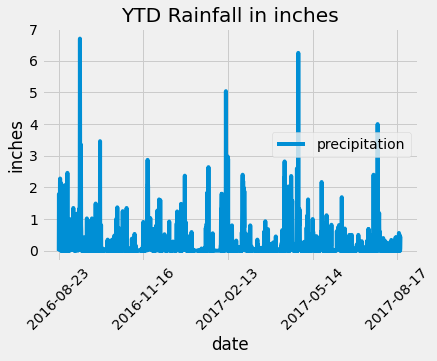

In [140]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
query_date = dt.date(int(dateRecent[0:4]), int(dateRecent[5:7]), int(dateRecent[8:10])) - dt.timedelta(days=365);

# Perform a query to retrieve the data and precipitation scores
prcpData = session.query(Measurement.date, Measurement.prcp)\
    .filter(Measurement.date >= query_date)\
    .all();

date = [];
prcp = [];
for data in prcpData :
    date.append(data[0]);
    prcp.append(data[1]);


# Save the query results as a Pandas DataFrame and set the index to the date column
YTD_Rainfall = pd.DataFrame(
    {
        'date': date,
        'precipitation':prcp
    }
);

# Sort the dataframe by date
YTD_Rainfall = YTD_Rainfall.sort_values(by='date')

#Drop null values
YTD_Rainfall = YTD_Rainfall.dropna()

# Use Pandas Plotting with Matplotlib to plot the data
YTD_Rainfall.plot(x='date',rot=45,ylabel='inches',title='YTD Rainfall in inches')
plt.show()

In [138]:
# Use Pandas to calculate the summary statistics for the precipitation data
YTD_Rainfall.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [29]:
for arg in dir(Base.classes.station) :
    if arg[0] != '_' :
        print(arg)

classes
elevation
id
latitude
longitude
metadata
name
prepare
registry
station


In [39]:
# Design a query to calculate the total number stations in the dataset
stationCount = session.query(func.count(Station.id)).first()[0];
print(f'There are {stationCount} stations in the dataset.')

There are 9 stations in the dataset.


In [76]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
ActiveStation = session.query(Measurement.station,func.count(Measurement.prcp))\
                    .group_by(Measurement.station)\
                    .order_by(func.count(Measurement.prcp).desc())\
                    .first();


In [87]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temMin, tempMax, tempAvg, tempCount = session.query(func.min(Measurement.tobs),
                                                 func.max(Measurement.tobs),
                                                 func.avg(Measurement.tobs),
                                                 func.count(Measurement.tobs))\
                                                .filter(Measurement.station == stationActivity[0][0])\
                                                .all()[0];

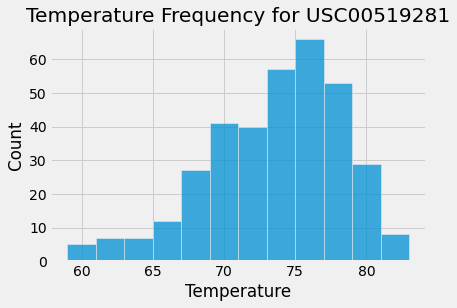

In [124]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
stationTOBS = session.query(Measurement.tobs)\
    .filter(Measurement.date >= query_date)\
    .filter(Measurement.station == stationActivity[0][0])\
    .all();

tobs = [];
for i,row in enumerate(stationTOBS) :
    tobs.append(stationTOBS[i][0])

ax = sn.histplot(tobs,bins=12)
ax.set(xlabel='Temperature',title=f'Temperature Frequency for {stationActivity[0][0]}')
plt.show()

# Close session

In [141]:
# Close Session
session.close()